In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [2]:
data_dir = "/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/snRNA-seq (1)/Raw_data/"
save_dir = "/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/snRNA-seq (1)/Procesed_data/R/"

In [3]:
adata = sc.read(save_dir + 'nonBC/arc.combined_non_bc_111621.h5ad')
adata

/Users/yuqitan/opt/anaconda3/envs/cruk/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 12326 × 24599
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_Hashtag', 'nFeature_Hashtag', 'Hashtag_maxID', 'Hashtag_secondID', 'Hashtag_margin', 'Hashtag_classification', 'Hashtag_classification.global', 'hash.ID', 'RNA_snn_res.0.55', 'seurat_clusters', 'time', 'condition', 'percent.actin', 'percent.gapdh'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [5]:
adata.obs['condition'].unique()

array(['leptinARC3h', 'leptinARC72h', 'leptinARC24h', 'ob', 'wt'],
      dtype=object)

In [9]:
adata_wt = adata[adata.obs['condition']=='wt']
adata_wt

View of AnnData object with n_obs × n_vars = 3557 × 24599
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_Hashtag', 'nFeature_Hashtag', 'Hashtag_maxID', 'Hashtag_secondID', 'Hashtag_margin', 'Hashtag_classification', 'Hashtag_classification.global', 'hash.ID', 'RNA_snn_res.0.55', 'seurat_clusters', 'time', 'condition', 'percent.actin', 'percent.gapdh'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [10]:
arc_markers = ["Slc17a6", "Slc32a1", "Gad1", "Lepr", "Npy", "Pomc", "Bnc2", "Sst", "Ghrh", "Th", "Pnoc","Agrp", "Magel2"]
arc_markers2 = ["Lepr", "Npy", "Pomc", "Bnc2"]


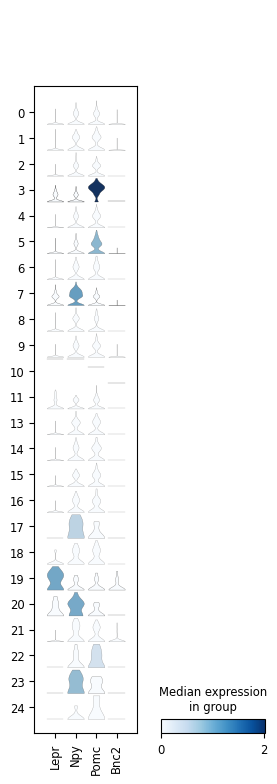

In [37]:
adata_wt.obs['seurat_clusters'] = adata_wt.obs['seurat_clusters'].astype("category").values
sc.pl.stacked_violin(adata_wt, arc_markers2, groupby='seurat_clusters')

TypeError: object of type 'int' has no len()

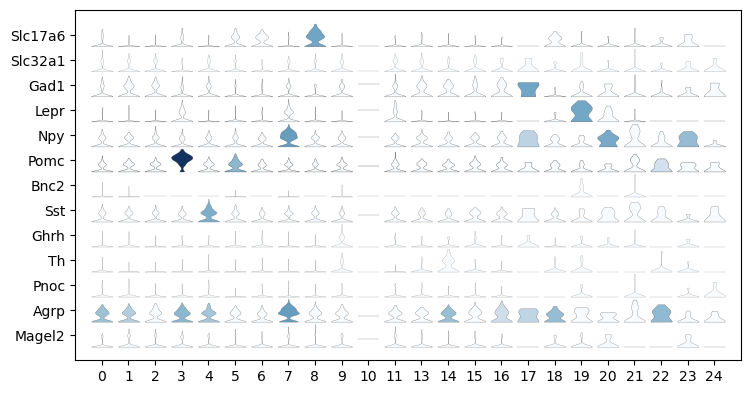

In [35]:
sc.pl.stacked_violin(adata_wt, arc_markers, groupby='seurat_clusters',swap_axes=True)

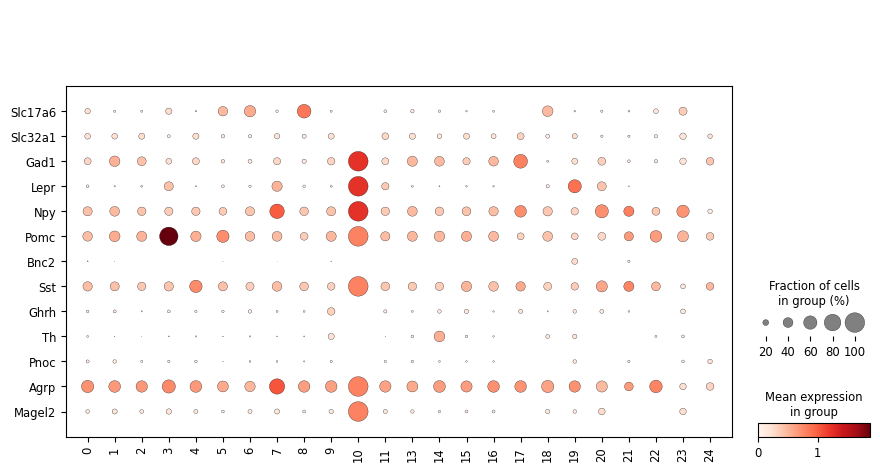

In [34]:
sc.pl.dotplot(adata_wt, arc_markers, groupby='seurat_clusters', swap_axes=True)

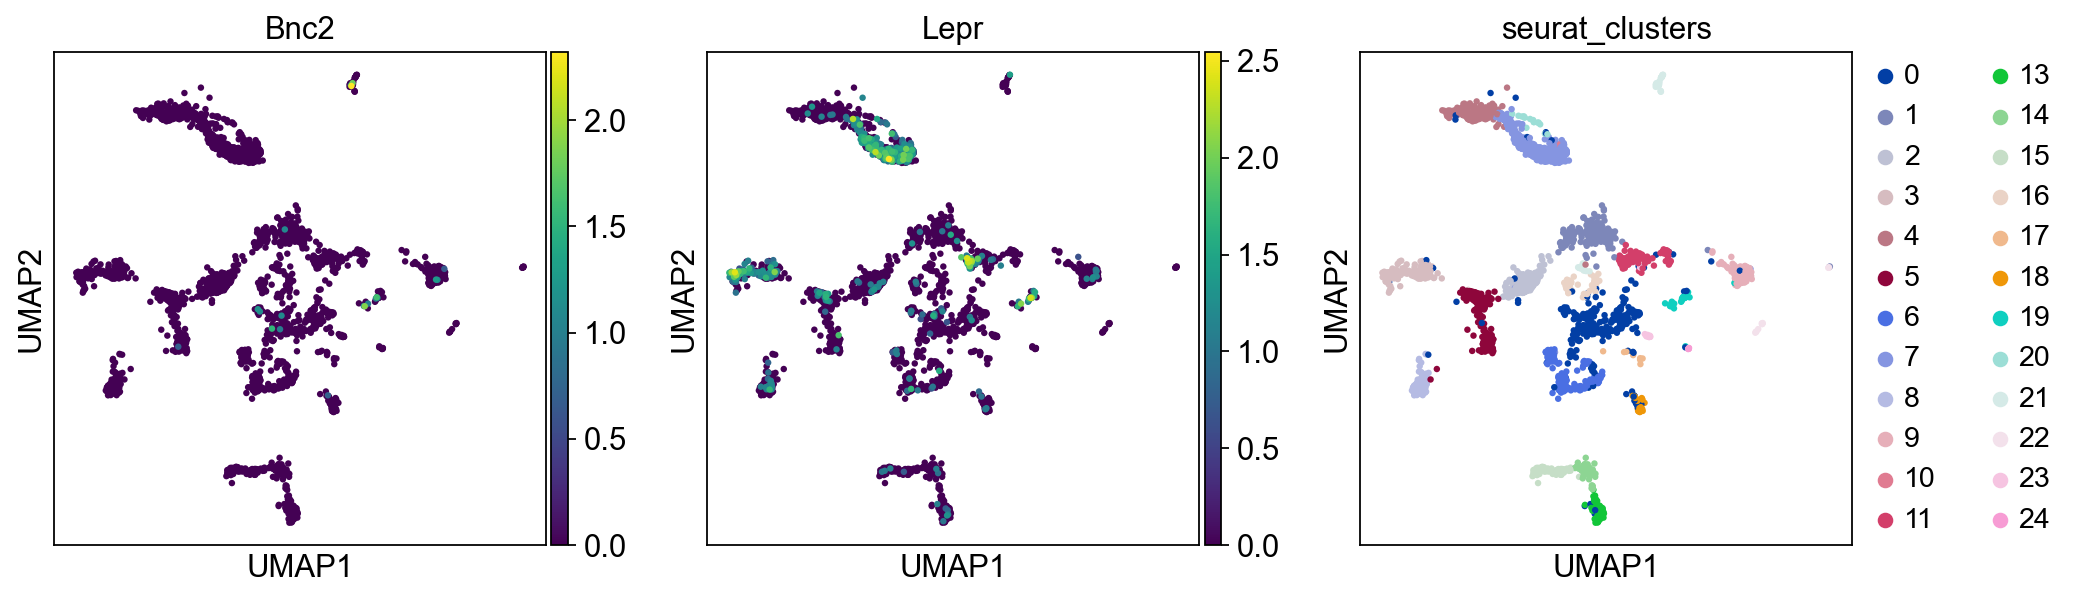

In [40]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.umap(adata_wt, color=['Bnc2', 'Lepr','seurat_clusters'])